In [305]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

### Using Colab (linked to Github):
https://www.kaggle.com/discussions/general/74235


In [306]:
# Mount Google Drive.
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [307]:
# ! pip install -q kaggle
# from google.colab import files
# files.upload()

In [308]:
# !rm -r /content/drive/MyDrive/kaggle
# !mkdir /content/drive/MyDrive/kaggle
# !mv ./kaggle.json /content/drive/MyDrive/kaggle/
# !chmod 600 /content/drive/MyDrive/kaggle/kaggle.json

In [309]:
# print("Files:")
# for dirname, _, filenames in os.walk('.'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [310]:
# API command of the dataset:
#!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset

In [311]:
# open the zip file in read mode
# !cp ./diabetes-health-indicators-dataset.zip /content/drive/MyDrive/csvs/diabetes-health-indicators-dataset.zip
# !unzip -q /content/drive/MyDrive/csvs/diabetes-health-indicators-dataset.zip -d /content/drive/MyDrive/csvs
# !rm /content/drive/MyDrive/csvs/diabetes-health-indicators-dataset.zip

In [312]:
# Use the desired dataset and remove the other 2:
df = pd.read_csv('/content/drive/MyDrive/csvs/diabetes_012_health_indicators_BRFSS2015.csv')
#!rm /content/drive/MyDrive/csvs/diabetes_binary_health_indicators_BRFSS2015.csv
#!rm /content/drive/MyDrive/csvs/diabetes_binary_5050split_health_indicators_BRFSS2015.csv

### Using Kaggle (linked with Github):

In [313]:
# print("Available datasets:")
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [314]:
# df = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv')

# Data understanding:
Questions that one might ask based on this dataset:

# Data preprocessing:

In [315]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Data cleaning:

#### Dealing with impossible and missing values:

Because the dataset is clean and complete (no missing values, no impossible values, no bad formatting), no further preprocessing of data is neccessary in this regards.

In [316]:
print("MISSING VALUES FOR EACH VARIABLE:\n",df.isnull().sum(), "\n")
print("SHAPE OF THE DATASET:", df.shape)

MISSING VALUES FOR EACH VARIABLE:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64 

SHAPE OF THE DATASET: (253680, 22)


##### NUMERICAL FEATURES:
Out of the 22 columns of the dataset, only *BMI, MentHlth, PhysHlth, Age* and *Income* are numerical features. In other words, they consist of actual numerical values.

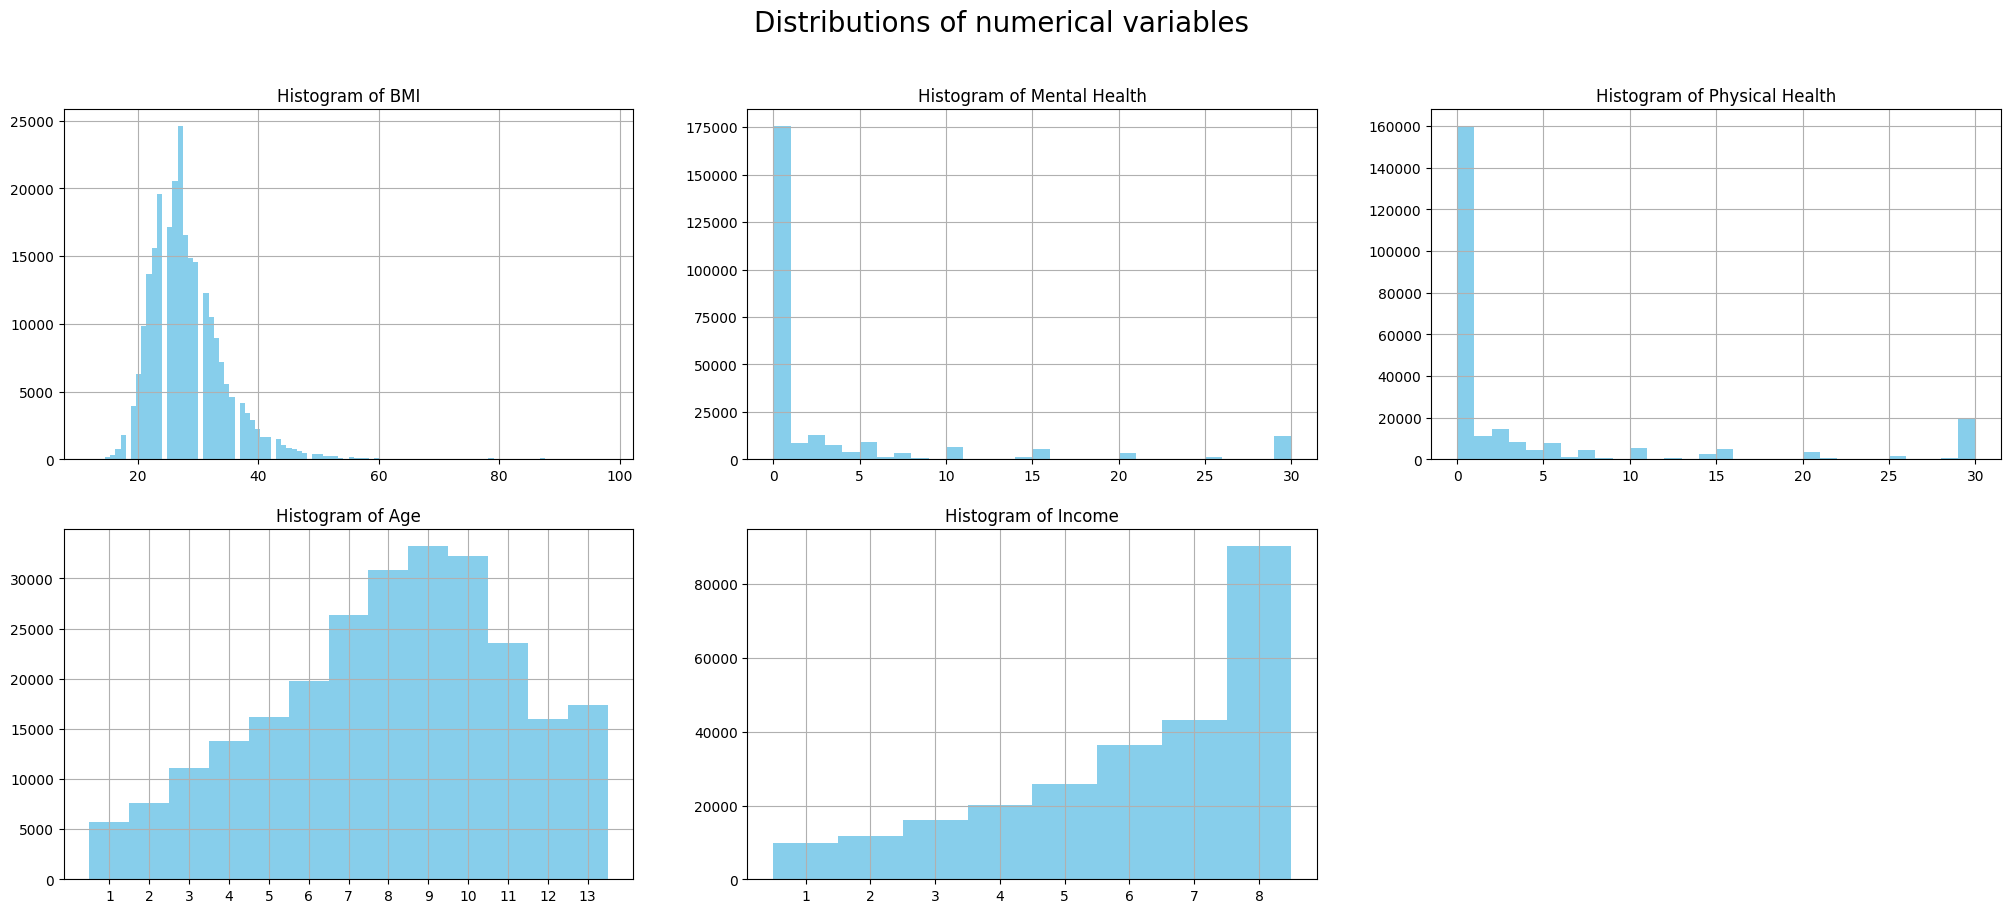

In [317]:
df_numerical = df[['BMI','MentHlth','PhysHlth','Age','Income']]

# Creation of subplots:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))

# Flatten the axes array to a 1D array
axes = axes.flatten()#Converting the 2D array of axes objects into a 1D array.
                     #Useful when you want iterating over the subplots,
                     #regardless of whether there is one row or multiple rows.

# Remove empty subplot in row 2, column 3 because it is empty
fig.delaxes(axes[-1])

# Specifications for each subplot
# Subplot for BMI:
axes[0].hist(df_numerical['BMI'], bins=100, color='skyblue')
axes[0].set_title('Histogram of BMI')
axes[0].grid(True)

# Subplot for MentHlth:
axes[1].hist(df_numerical['MentHlth'], bins=30, color='skyblue')
axes[1].set_title('Histogram of Mental Health')
axes[1].grid(True)

# Subplot for PhysHlth:
axes[2].hist(df_numerical['PhysHlth'], bins=30, color='skyblue')
axes[2].set_title('Histogram of Physical Health')
axes[2].grid(True)

# Subplot for Age:
axes[3].hist(df_numerical['Age'], bins=np.arange(0.5, 14, 1), color='skyblue')
axes[3].set_title('Histogram of Age')
axes[3].set_xticks(np.arange(1, 14, 1))  # Set custom xticks
axes[3].grid(True)

# Subplot for Income:
axes[4].hist(df_numerical['Income'], bins=np.arange(0.5, 9, 1), color='skyblue')
axes[4].set_title('Histogram of Income')
axes[4].grid(True)

# Adjust layout
# plt.tight_layout()
plt.suptitle("Distributions of numerical variables", fontsize=20)
plt.show()

##### CATEGORICAL FEATURES:
The rest of the variables in the dataset are categorical, having only a set of possible values. Within them, we find those which have only 2 possible values (0 or 1), *BI-CATEGORICAL VARIABLES*; and those which have more than 2 possible values, *MULTI-CATEGORICAL VARIABLES*.

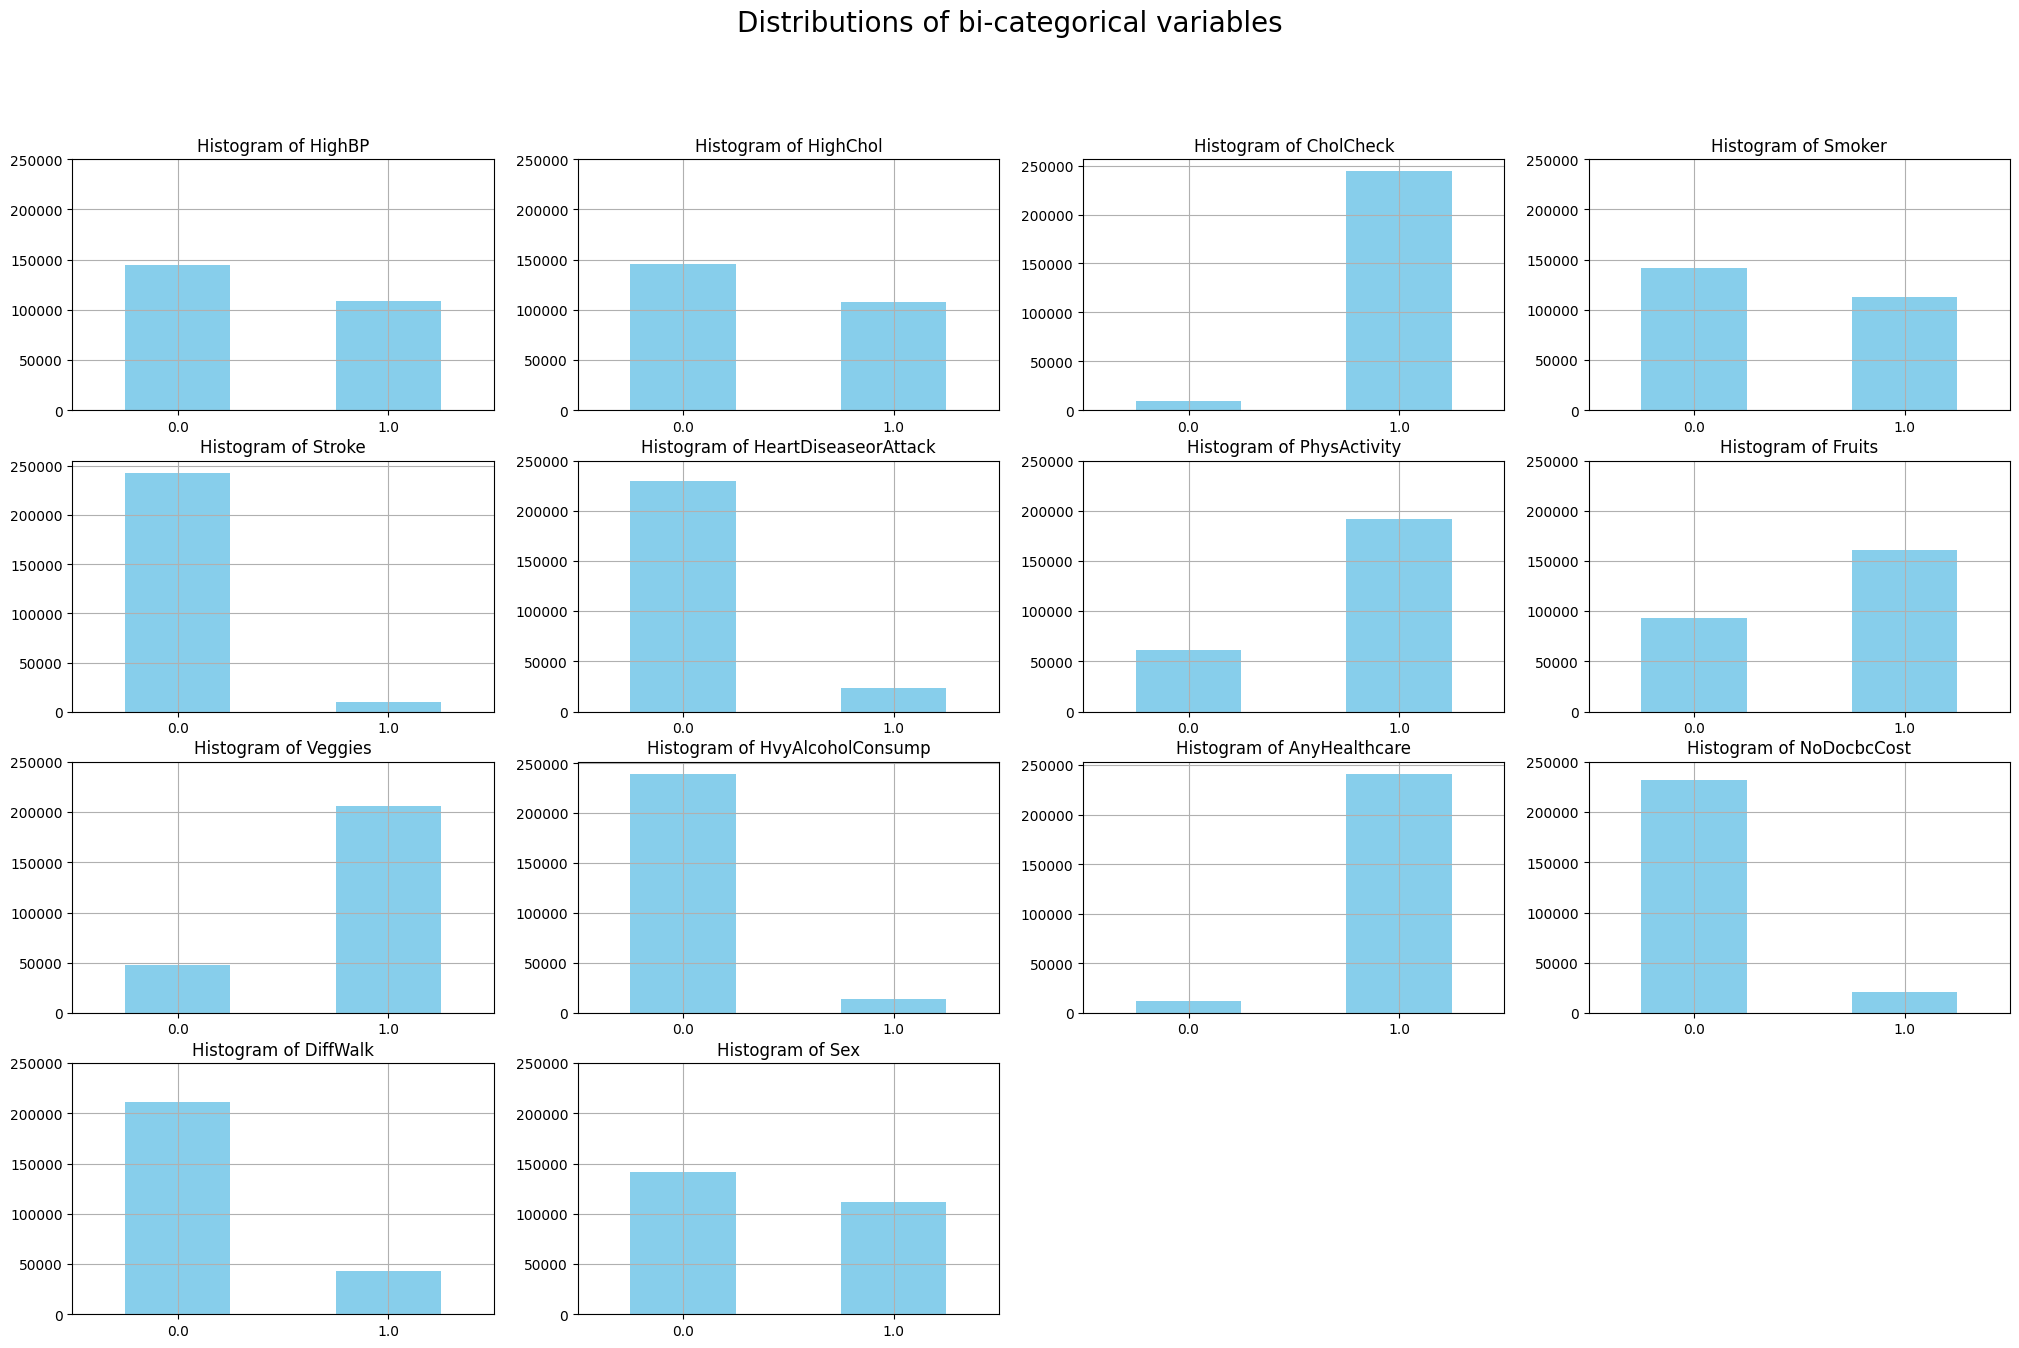

In [318]:
# BI-CATEGORICAL VARIABLES:
df_biCategorical = df[['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk','Sex']]

# Creation of subplots:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25, 15)) #'axes' is an array with two elements, 2D.
                                                            # Each 'axes' object represents one subplot.

# Flatten the axes array to a 1D array
axes = axes.flatten()#Converting the 2D array of axes objects into a 1D array.
                     #Useful when you want iterating over the subplots,
                     #regardless of whether there is one row or multiple rows.

# Remove empty subplot in row 2, column 3 because it is empty
fig.delaxes(axes[-2])
fig.delaxes(axes[-1])

for i, feature in enumerate(df_biCategorical.columns):
    ax = axes[i]
    df_biCategorical[feature].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel('')
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_yticks(np.arange(0, 300000, 50000))
    ax.grid(True)

# Adjust layout
plt.suptitle("Distributions of bi-categorical variables", fontsize=20)
#plt.tight_layout()
plt.show()

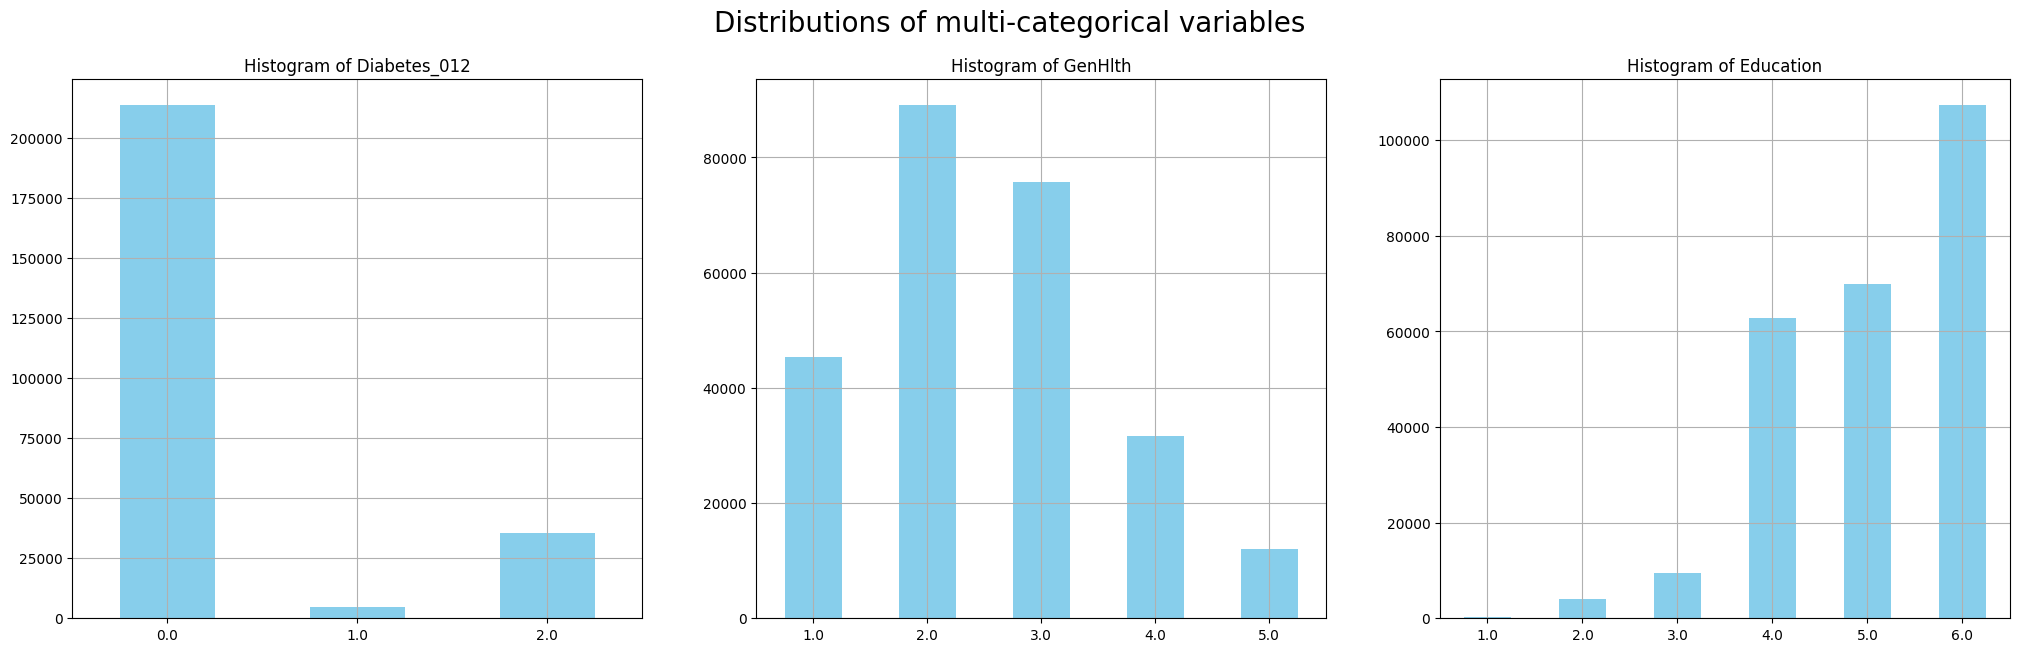

In [319]:
#MULTI-CATEGORICAL VARIABLES:
df_multiCategorical = df[['Diabetes_012','GenHlth','Education']]

# Creation of subplots:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7)) #'axes' is an array with two elements, 2D.
                                                            # Each 'axes' object represents one subplot.

for i, feature in enumerate(df_multiCategorical.columns):
    ax = axes[i]
    df_multiCategorical[feature].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel('')
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.grid(True)

# Adjust layout
#plt.tight_layout()
plt.suptitle("Distributions of multi-categorical variables", fontsize=20)
plt.show()

Feature "Diabetes_012" will be considered as a target class. In this scenario, an imbalance can be observed. In order to tackle this, a data reduction through sampling must be applied.

#### Outliers:
Feature "BMI" was studied in more depth to analyse the existence of outliers. As shown in the BoxPlot diagram, many values lie above the last quartile. Because

In [320]:
num_of_outliers = df_numerical['BMI'][df_numerical['BMI']>40].count()
total_data = df.shape[0]
percentage_of_outliers = (num_of_outliers/total_data) * 100
print(round(percentage_of_outliers, 2),"% of the total data are outliers regarding the feature 'BMI'.")

4.52 % of the total data are outliers regarding the feature 'BMI'.


In [321]:
# PONER LOS BOXPLOTS EN LA MISMA FIGURA
#fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25, 15))

Text(0.5, 1.0, "Distribution of feature 'BMI'")

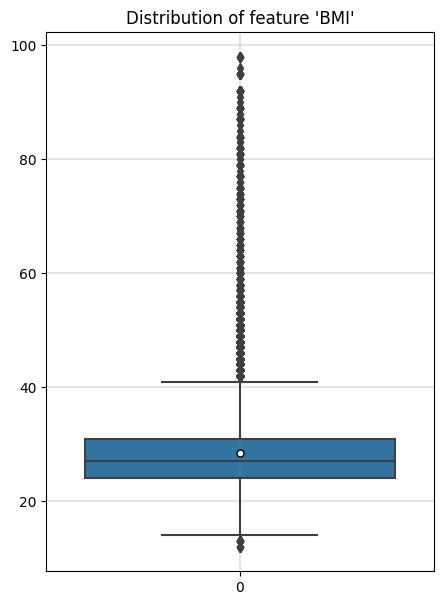

In [322]:
plt.figure(figsize = (5,7))
sb.boxplot(df_numerical['BMI'],
           showmeans = True,
           meanprops={"marker":"o",
                      "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"5"}
                      )

plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.title("Distribution of feature 'BMI'")

In [323]:
# plt.figure(figsize = (5,7))
# sb.boxplot(df_multiCategorical['Education'],
#            showmeans = True,
#            meanprops={"marker":"o",
#                       "markerfacecolor":"white",
#                        "markeredgecolor":"black",
#                       "markersize":"5"}
#                       )

# plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
# plt.title("Distribution of feature 'Education'")

In [324]:
features_no_corr=chooseNoCorrFeatures(0.15, df)
features_no_corr

['CholCheck', 'HvyAlcoholConsump', 'Sex']

In [325]:
# plt.figure(figsize = (5,7))
# sb.boxplot(df_numerical['PhysHlth'],
#            showmeans = True,
#            meanprops={"marker":"o",
#                       "markerfacecolor":"white",
#                        "markeredgecolor":"black",
#                       "markersize":"5"}
#                       )

# plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
# plt.title("Distribution of feature 'Mental Health'")


### Data reduction

#### Removing duplicates in rows:

In [326]:
orignialRows_df = df.copy()
df = df.drop_duplicates()
df.describe()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,...,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.325627,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.103216,0.733355,0.612966,...,0.946075,0.092810,2.601151,3.505373,4.675178,0.185507,0.439231,8.086582,4.980568,5.890383
std,0.724623,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.304241,0.442206,0.487073,...,0.225871,0.290167,1.064685,7.713725,9.046568,0.388709,0.496295,3.093809,0.992895,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [327]:
orignialRows_df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [328]:
num_of_outliers = df_numerical['BMI'][df_numerical['BMI']>40].count()
total_data = df.shape[0]
percentage_of_outliers = (num_of_outliers/total_data) * 100
print(round(percentage_of_outliers, 2),"% of the total data are outliers regarding the feature 'BMI'.")

5.0 % of the total data are outliers regarding the feature 'BMI'.


In [329]:
# plt.figure(figsize = (5,7))
# sb.boxplot(df_numerical['BMI'],
#            showmeans = True,
#            meanprops={"marker":"o",
#                       "markerfacecolor":"white",
#                        "markeredgecolor":"black",
#                       "markersize":"5"}
#                       )

# plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
# plt.title("Distribution of feature 'BMI'")

#### Removing irrelevant features:  

In [330]:
def chooseNoCorrFeatures(corr_treshold, *dataframes):
    """
    Returns a list of features from the datframe,
    that correlate with the rest with values below
    the treshold.
    Parameters:
    > *dataframe: various Dataframes to apply the function
    > corr_treshold: float of maximum correlation
    """
    list_of_feat = []
    for dataframe in dataframes:
        # Ensure that the input is a DataFrame
        if not isinstance(dataframe, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")

        # Transformations to the correlation matrix:
        corr_values = dataframe.corr().abs()
        # Mask the diagonal elements
        np.fill_diagonal(corr_values.values, 0)

        # Choosing features with under a correlation treshold:
        features_noCorr = (corr_values <= corr_treshold).all(axis=1)
        arrayFeat = features_noCorr.index[features_noCorr]
        list_of_feat.extend(arrayFeat)

    return list_of_feat


In [331]:
#Max correlation value of each feature in the dataframe
#df.corr().replace(1,np.nan).describe().iloc[-1,:]

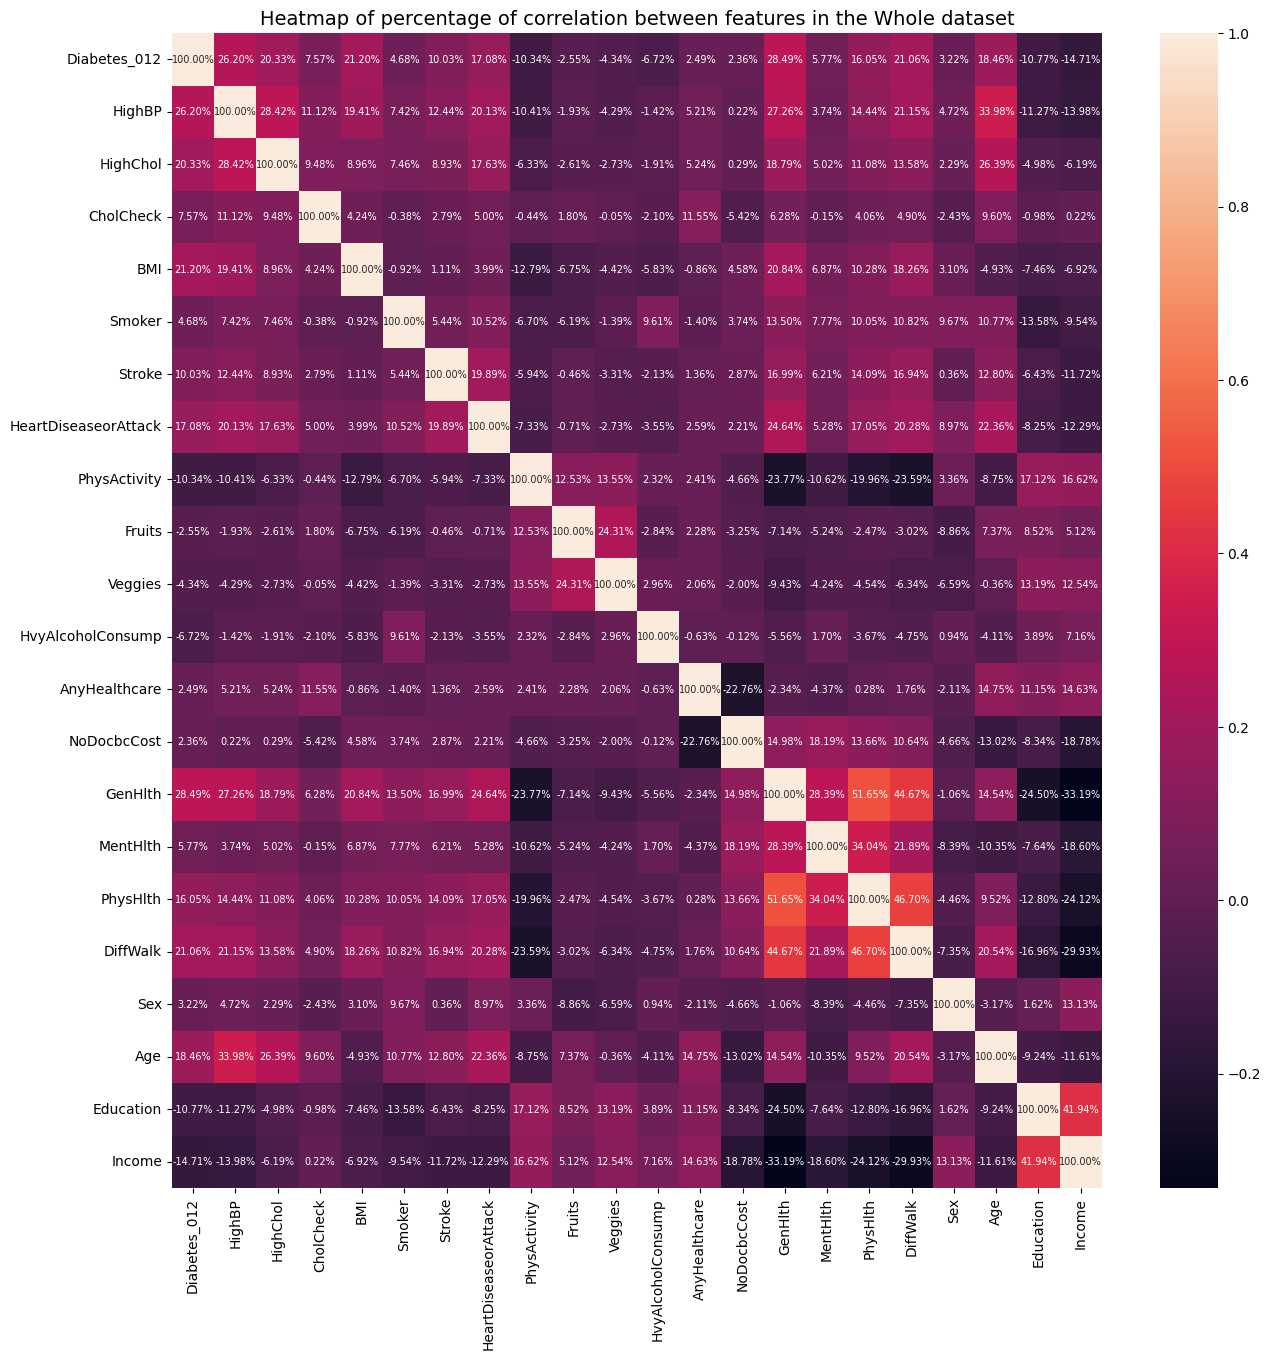

In [332]:
plt.figure(figsize=(15, 15))
sb.heatmap(df.corr(), annot=True, fmt='.2%', annot_kws={'size': 7})
plt.title('Heatmap of percentage of correlation between features in the Whole dataset', fontsize=14);

Function *chooseNoCorrFeatures* selects the features where correlation value with the rest features is under a certain treshold.
Applying it, we can exclude features that have litte relation with the rest of the of features.

In [333]:
features_no_corr=chooseNoCorrFeatures(0.13, df)
features_no_corr

['CholCheck', 'HvyAlcoholConsump']

In [334]:
df.drop(labels=features_no_corr, axis=1, inplace=True)
df.shape

(229781, 20)

#### Removing features with little correlation with "Diabetes_012"
First, the features that correlate with "Diabetes_012" with values \<0.1 are selected.

In [335]:
# Features with correlation with "Diabetes_012" < 0.1
no_corr_diabetes = df.columns[(df.corr()["Diabetes_012"]<0.1)]
no_corr_diabetes

Index(['Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'AnyHealthcare',
       'NoDocbcCost', 'MentHlth', 'Sex', 'Education', 'Income'],
      dtype='object')

A closer analysis of this features is conducted, selecting for each of them the attribute with most correlation.<br>

In [336]:
# Max correlation value of this features in the whole dataframe
max_values_ncd = df.corr().replace(1,np.nan).abs().describe().loc['max', no_corr_diabetes]

In [337]:
# Attributes to which they correlate the most.
indirect_correlations=[]
for feature in max_values_ncd.index:
    name = df.columns[df.corr().abs()[feature]==max_values_ncd[feature]].tolist() # for every index in max_values_ncd,
    indirect_correlations.append(name[0])                                         # find the column name where value
                                                                                  # find the column name where value
                                                                                  # matches the value in max_values_ncd
    print(feature," is most correlated to ", name[0])

Smoker  is most correlated to  Education
PhysActivity  is most correlated to  GenHlth
Fruits  is most correlated to  Veggies
Veggies  is most correlated to  Fruits
AnyHealthcare  is most correlated to  NoDocbcCost
NoDocbcCost  is most correlated to  AnyHealthcare
MentHlth  is most correlated to  PhysHlth
Sex  is most correlated to  Income
Education  is most correlated to  Income
Income  is most correlated to  Education


It is observed that many of the attributes related to non-influencing-diabetes features, do have some significant effect in other features very related to diabetes. In other words, indirectly, this apparently low-correlated features have an impact on the Diabetes diagnosis through *intermediate* features

In [338]:
indirect_corr = list(set(indirect_correlations))
print("List of features that DIRECTLY correlate poorly with 'Diabetes_012':\n", indirect_corr)

List of features that DIRECTLY correlate poorly with 'Diabetes_012':
 ['Veggies', 'AnyHealthcare', 'Fruits', 'NoDocbcCost', 'GenHlth', 'Education', 'PhysHlth', 'Income']


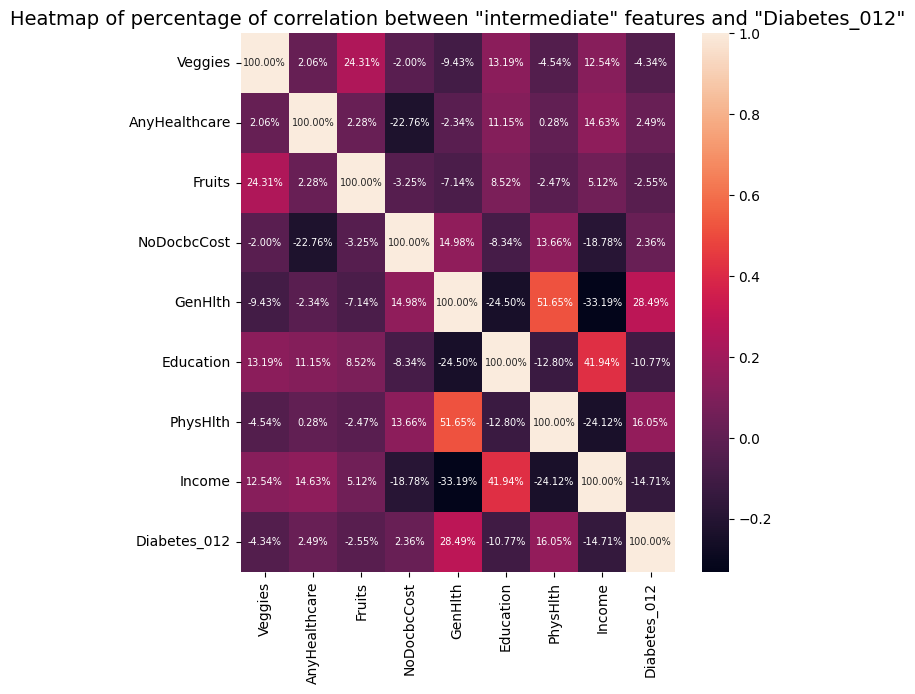

In [339]:
# HEATMAP THAT SHOWS THE CORRELATION OF THE INTERMEDIATE FEATURES TO 'Diabetes_012'
indirect_corr.append("Diabetes_012")
plt.figure(figsize=(7, 7))
sb.heatmap(df[indirect_corr].corr(), annot=True, fmt='.2%', annot_kws={'size': 7})
plt.title('Heatmap of percentage of correlation between "intermediate" features and "Diabetes_012"', fontsize=14);

Studying this heatmap, it is clear that the feature **"GenHlth" accounts for the most meaningful impact on the diagnosis for Diabetes**, with a correlation of 28.49%. <br>
But also, it can be seen that **"GenHlth" is very influenced by many of the other features**: "PhysHlth", "Income", "Education" and "NoDocbcCost".

In [341]:
# HEATMAP THAT SHOWS THE CORRELATION OF THE INTERMEDIATE FEATURES TO 'Diabetes_012'
no_corr_diabetes.append("GenHlth")
plt.figure(figsize=(7, 7))
sb.heatmap(df[no_corr_diabetes].corr(), annot=True, fmt='.2%', annot_kws={'size': 7})
plt.title('Correlation between least-related to Diabetes features and "GenHlth"', fontsize=14);

TypeError: ignored

* eating Fruis and Vegetables are very correlated between each other, but neither ot them have an important influence in "Diabetes_012". The

In [ ]:
indirect_corr.append("Diabetes_012")
# Features with correlation with "Diabetes_012" < 0.1
no_corr_diabetes = df.columns[(df[["Diabetes_012",indirect_corr]].corr()["Diabetes_012"]<0.1)]
no_corr_diabetes

In [ ]:
# Joined list of the lowest correlated features to diabetes and
# their respective most correlated value:
study_corr = list(set((max_values_ncd.index).tolist() + indirect_corr))

In [ ]:
plt.figure(figsize=(15, 15))
sb.heatmap(df[study_corr].corr(), annot=True, fmt='.2%', annot_kws={'size': 7})
plt.title('Heatmap of percentage of correlation between features in the Whole dataset', fontsize=14);

In [ ]:
df[indirect_correlations]

In [ ]:
df=orignialRows_df

In [ ]:
# df.drop(labels=no_corr_diabetes, axis=1, inplace=True)
# df.shape

In [ ]:
#HEATMAPS BY DATAFRAMES

# plt.figure(figsize=(11, 11))
# sb.heatmap(df_biCategorical.corr(), annot=True, fmt='.2%', annot_kws={'size': 7})
# plt.title('Heatmap of percentage of correlation between bi-categorical values', fontsize=14);

# plt.figure(figsize=(5, 5))
# sb.heatmap(df_multiCategorical.corr(), annot=True, fmt='.2%')
# plt.title('Heatmap of percentage of correlation between multi-categorical values', fontsize=14);

# plt.figure(figsize=(5, 5))
# sb.heatmap(df_numerical.corr(), annot=True, fmt='.2%')
# plt.title('Heatmap of percentage of correlation between numerical values', fontsize=14);

#### Data reduction: sampling to deal with imbalance.
For an imbalanced class dataset F1 score is a more appropriate metric. After checking it, i will oversample...
https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/#h-what-is-imbalanced-data-and-how-to-handle-it